# Stroke  Disease Prediction
# Life Cycle of Machine Learning
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratoy Data Analysis
- Data Pre-processing
- Model Training
- Choose the best Model
1) Problem Statement
-This project seeks to understand how the risk of heart disease is affected by various factors such as Gender, Age, Education Level, Smoking Status, Cigarettes Consumed Per Day, Blood Pressure Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes, Total Cholesterol, Systolic Blood Pressure, Diastolic Blood Pressure, Body Mass Index (BMI), Heart Rate, and Glucose Levels.

2) The Project goal
The goal is to analyze the impact of these factors on the likelihood of heart disease and make predictions based on the provided features
3) Data Source
Dataset source - https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
This data consists of 16 columns and 4240 rows
## 3.1 Import Data and Required Packages

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



Import the Dataset as pandas Dataframe

In [286]:
#@import data as dataframe
df=pd.read_csv('Data\\stroke_prediction_dataset.csv')

show the top 5 records from the dataset

In [287]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


shape of the dataset

In [288]:
df.shape

(15000, 22)

## 4) Data Checks to perform
- Check missing values
- Check Duplicates
- Check data types
- Check number of unique values in each column
- Check statistics of data set
- check outliers
- Check information about the dataset

### 4.1) Check missing values

In [289]:
df.isna().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

#### column name Symptoms has missing values of 2500 counts

In [290]:
df.Symptoms =df.Symptoms.fillna('median')

### 4.2) Check Duplicates

In [291]:
df.duplicated().sum()

0

##### No duplicates found in our dataset

### 4.3) Check data types

In [292]:
df.dtypes

Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Blood Pressure Levels        object
Cholesterol Levels           object
Symptoms                     object
Diagnosis                    object
dtype: object

### 4.4) Check number of unique values in each column

In [293]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

Patient ID
[18153 62749 32145  6154 48973]
15000
Patient Name
['Mamooty Khurana' 'Kaira Subramaniam' 'Dhanush Balan' 'Ivana Baral'
 'Darshit Jayaraman']
13818
Age
[56 80 26 73 51]
73
Gender
['Male' 'Female']
2
Hypertension
[0 1]
2
Heart Disease
[1 0]
2
Marital Status
['Married' 'Single' 'Divorced']
3
Work Type
['Self-employed' 'Never Worked' 'Private' 'Government Job']
4
Residence Type
['Rural' 'Urban']
2
Average Glucose Level
[130.91 183.73 189.   185.29 177.34]
9215
Body Mass Index (BMI)
[22.37 32.57 20.32 27.5  29.06]
2490
Smoking Status
['Non-smoker' 'Formerly Smoked' 'Currently Smokes']
3
Alcohol Intake
['Social Drinker' 'Never' 'Rarely' 'Frequent Drinker']
4
Physical Activity
['Moderate' 'Low' 'High']
3
Stroke History
[0 1]
2
Family History of Stroke
['Yes' 'No']
2
Dietary Habits
['Vegan' 'Paleo' 'Pescatarian' 'Gluten-Free' 'Vegetarian']
7
Stress Levels
[3.48 1.73 7.31 5.35 6.84]
1001
Blood Pressure Levels
['140/108' '146/91' '154/97' '174/81' '121/95']
4458
Cholesterol Levels
['

### 4.5) Check the stats

In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,15000.0,49715.802867,29000.656642,1.00,24562.0000,49448.00,75112.0000,99975.0
Age,15000.0,54.035667,21.063111,18.00,36.0000,54.00,72.0000,90.0
Hypertension,15000.0,0.249000,0.432448,0.00,0.0000,0.00,0.0000,1.0
Heart Disease,15000.0,0.502933,0.500008,0.00,0.0000,1.00,1.0000,1.0
Average Glucose Level,15000.0,129.445209,40.487792,60.00,94.5175,128.90,164.5925,200.0
Body Mass Index (BMI),15000.0,27.474302,7.230201,15.01,21.1600,27.42,33.7200,40.0
Stroke History,15000.0,0.500267,0.500017,0.00,0.0000,1.00,1.0000,1.0
Stress Levels,15000.0,5.022694,2.873223,0.00,2.5400,5.05,7.5200,10.0


### 4.6) Checking Outliers

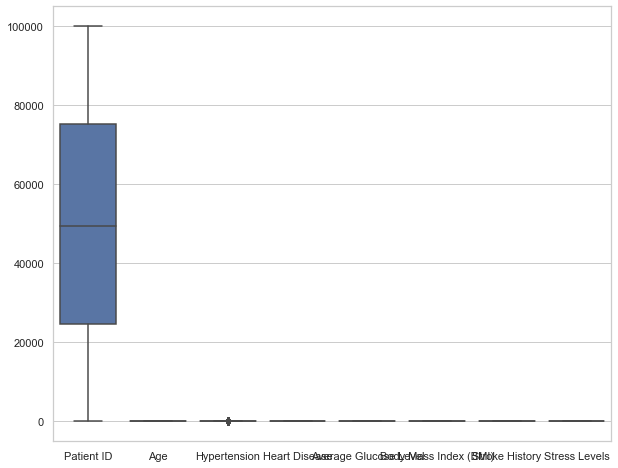

In [295]:
plt.figure(figsize=(10,8),facecolor='w')
sns.boxplot(data=df)
plt.show()

In [296]:
def out_iqr(df, columns):
    q25, q75 = df[columns].quantile([0.25,0.75])
    irq = q75 - q25
    lower, upper = q25 - 1.5 * irq, q75 + 1.5 * irq
    
    print(f"The IQR is {irq:.2f}")
    print(f"The lower bound is {lower:.2f}")
    print(f"The upper bound is {upper:.2f}")
    
    outliers = df[(df[columns] < lower) | (df[columns] > upper)]
    print(f"Total number of outliers: {outliers.shape[0]}")
    
    
columns = ['Age','Hypertension', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']
for column in columns:
    print(column)
    out_iqr(df, column)  
    print()

Age
The IQR is 36.00
The lower bound is -18.00
The upper bound is 126.00
Total number of outliers: 0

Hypertension
The IQR is 0.00
The lower bound is 0.00
The upper bound is 0.00
Total number of outliers: 3735

Average Glucose Level
The IQR is 70.08
The lower bound is -10.60
The upper bound is 269.71
Total number of outliers: 0

Body Mass Index (BMI)
The IQR is 12.56
The lower bound is 2.32
The upper bound is 52.56
Total number of outliers: 0

Stress Levels
The IQR is 4.98
The lower bound is -4.93
The upper bound is 14.99
Total number of outliers: 0



#### 4.6.1) imputing outliers

In [297]:
def impute_outlier(df,columns):
    q1,q3=df[columns].quantile([0.25,0.75])
    iqr=q3-q1
    lower_tail,upper_tail=q1-1.5*iqr,q3+1.5*iqr
    median=df[columns].median()
    
    df[columns] = df[columns].apply(lambda x: median if x < lower_tail or x > upper_tail else x)
    print(f'Outliers in {columns} have being replaced with the median')
    
columns = ['Hypertension']
for column in columns:
    impute_outlier(df,column) 

Outliers in Hypertension have being replaced with the median


## 4.7) checking the information of the dataset

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  float64
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

## 5) Exploratory Analysis
### 5.1) Target Variable analysis

In [299]:
df.Diagnosis.value_counts(normalize=True)

No Stroke    0.502133
Stroke       0.497867
Name: Diagnosis, dtype: float64

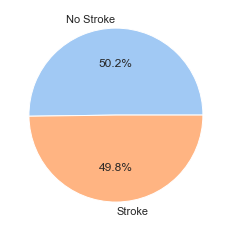

In [300]:
color=sns.color_palette('pastel')
data=df['Diagnosis'].value_counts()
label=data.index
plt.pie(data,labels=label,colors=color,autopct="%1.1f%%")
plt.show()

Conclusion: The distribution of target variable is highly balanced.This will  not lead  the problem of  fitting of models.

### 5.2 Univariate Analysis

- Categorical variables

In [301]:
columns=['Patient ID','Patient Name','Marital Status','Residence Type','Stroke History','Heart Disease']
df.drop(columns=columns,axis=1,inplace=True)
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Work Type', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Family History of Stroke', 'Dietary Habits',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [302]:
for cat in categorical_columns:
    print(cat)
    print(df[cat].value_counts()[:5])

Gender
Male      7622
Female    7378
Name: Gender, dtype: int64
Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: Work Type, dtype: int64
Smoking Status
Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: Smoking Status, dtype: int64
Alcohol Intake
Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: Alcohol Intake, dtype: int64
Physical Activity
High        5060
Moderate    4998
Low         4942
Name: Physical Activity, dtype: int64
Family History of Stroke
Yes    7592
No     7408
Name: Family History of Stroke, dtype: int64
Dietary Habits
Paleo             2192
Vegan             2185
Vegetarian        2170
Non-Vegetarian    2144
Keto              2135
Name: Dietary Habits, dtype: int64
Blood Pressure Levels
96/70     14
157/73    12
141/74    11
160/67    11
112/81    11
Name: Blood Pressure Levels, dtype: int64
Cholesterol Levels
HDL: 50, LDL: 1

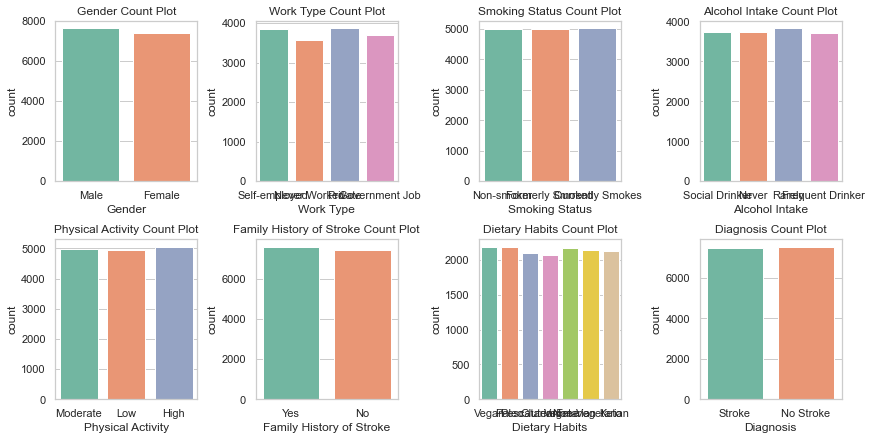

In [303]:
categorical_columns=['Gender', 'Work Type', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Family History of Stroke','Dietary Habits','Diagnosis']
num_plots=len(categorical_columns)
total_columns=4
total_rows=(num_plots+total_columns -1)//total_columns
fig,axs=plt.subplots(nrows=total_rows,ncols=total_columns,figsize=(3*total_columns,3*total_rows),constrained_layout=True)

axs=axs.flatten()
for i, var in enumerate(categorical_columns):
    sns.countplot(x=var, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(f'{var} Count Plot')

- numeric variables

In [304]:
numerical_col=df.select_dtypes(exclude='object').columns
numerical_col

Index(['Age', 'Hypertension', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stress Levels'],
      dtype='object')

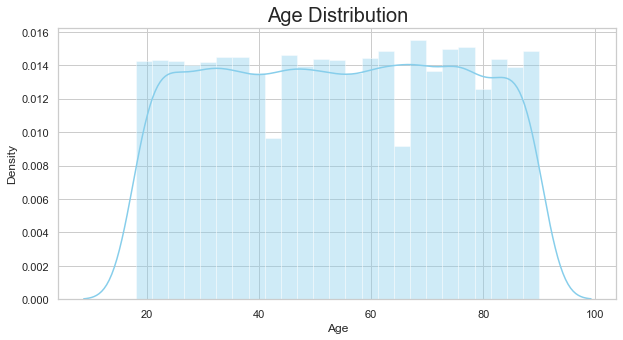

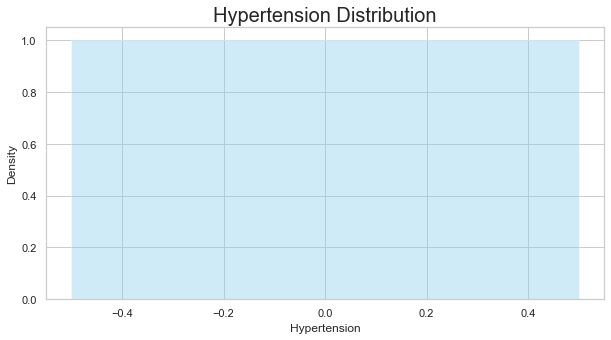

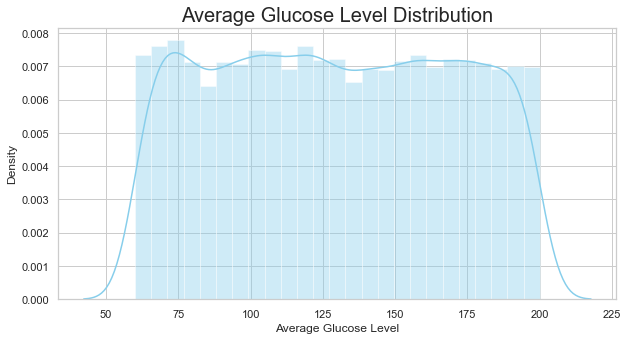

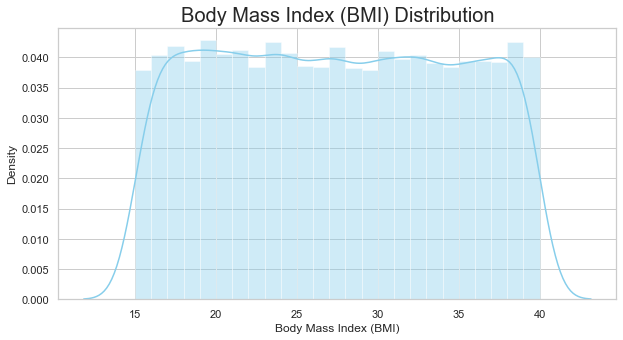

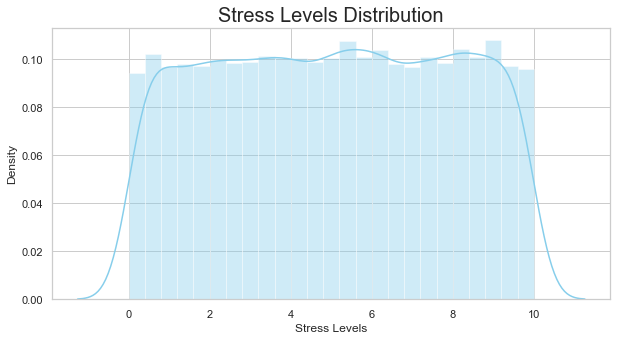

In [305]:
for num in numerical_col:
    plt.figure(figsize=(10,5),facecolor='w')
    sns.distplot(df[num],color='skyblue',bins='auto')
    plt.title(f'{num} Distribution',fontsize=20)
    plt.show()

### 5.3 ) Bivarite Analysis

- Countplot of people who is currently smoking ,non smoker,or formely not according to the gender.

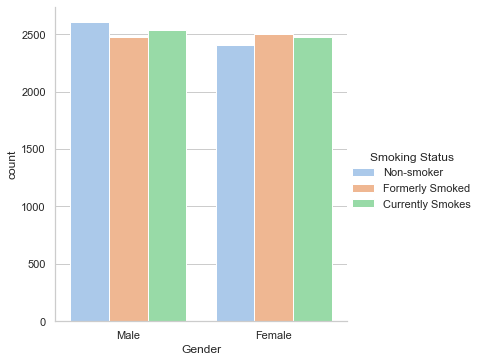

In [306]:
sns.catplot(data=df,kind='count',x='Gender',hue='Smoking Status',palette='pastel')

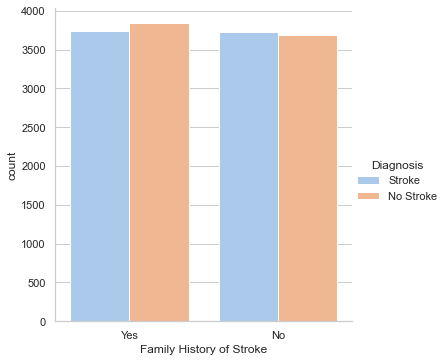

In [307]:
sns.catplot(data=df,kind='count',x='Family History of Stroke',hue='Diagnosis',palette='pastel')

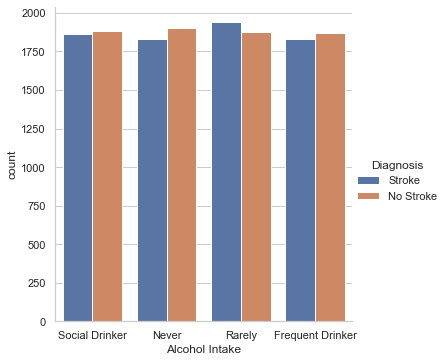

In [308]:
sns.catplot(data=df,kind='count',x='Alcohol Intake',hue='Diagnosis')

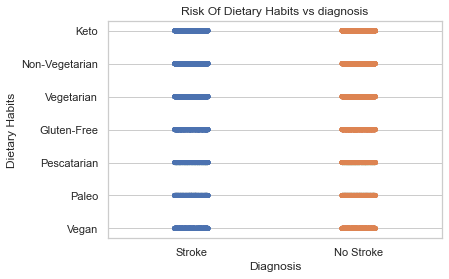

In [309]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='Diagnosis',y='Dietary Habits',data=df)
plt.title('Risk Of Dietary Habits vs diagnosis')
plt.show()

### 5.4) Multivarite Analysis

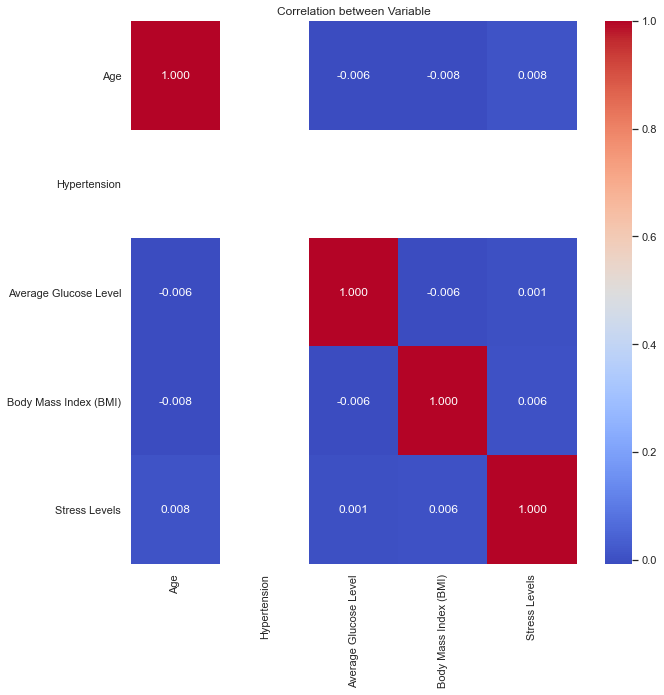

In [310]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt='.3f',cmap='coolwarm')
plt.title('Correlation between Variable')
plt.show()

## 6) Feature Selection
Feature selection
- Feature selection is the process of choosing the most important features (variables) from your dataset that are relevant to your target variable. This step helps to improve the performance of machine learning models by reducing complexity, overfitting, and computation time.